

> [FLIGHT PRICE PREDICTION](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)



Research Questions

The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

# Import Library and Dataset

In [91]:
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import numpy as np
import gdown

In [92]:
data = pd.read_excel('/content/Clean_Dataset.xlsx')

data.sample()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
110580,110580,Vistara,UK-858,Bangalore,Early_Morning,one,Early_Morning,Hyderabad,Economy,25.17,10,7813


In [93]:
data.drop(data.columns[0], axis=1, inplace=True)

In [94]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Does price vary with Airlines?

In [95]:
airline = data.groupby('airline')

pricebyairline1 = airline['price'].mean()
pricebyairline2 = airline['price'].std()
pricebyairline3 = airline['price'].median()
pricebyairline = pd.concat([pricebyairline1, pricebyairline2, pricebyairline3], axis=1)
pricebyairline.columns = ['mean', 'std', 'median']
pricebyairline.sort_values(by='mean', ascending=False)

,mean,std,median
airline,,,
Vistara,30396.536302,25637.159445,15543.0
Air_India,23507.019112,20905.116909,11520.0
SpiceJet,6179.278881,2999.630406,5654.0
GO_FIRST,5652.007595,2513.865560,5336.0
Indigo,5324.216303,3268.894831,4453.0
AirAsia,4091.072742,2824.055172,3276.0


Prices vary between Airlines. Based on the mean price, Vistara Airlines is the most expensive airline with a relatively high standard deviation, which signifies that Vistara Airlines has a more substantial pricing variation. On the other hand, AirAsia has the cheapest pricing among others, with the lowest mean, standard deviation, and median price. It indicates that AirAsia is likely to offer the most affordable pricing.

# How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [96]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [97]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [98]:
prices12days = data[(data['days_left'] == 1) | (data['days_left'] == 2)]

prices12days

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
298090,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.83,2,66129
298091,Vistara,UK-834,Chennai,Evening,one,Morning,Hyderabad,Business,16.50,2,82784
298092,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.42,2,82784
298093,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.83,2,82784


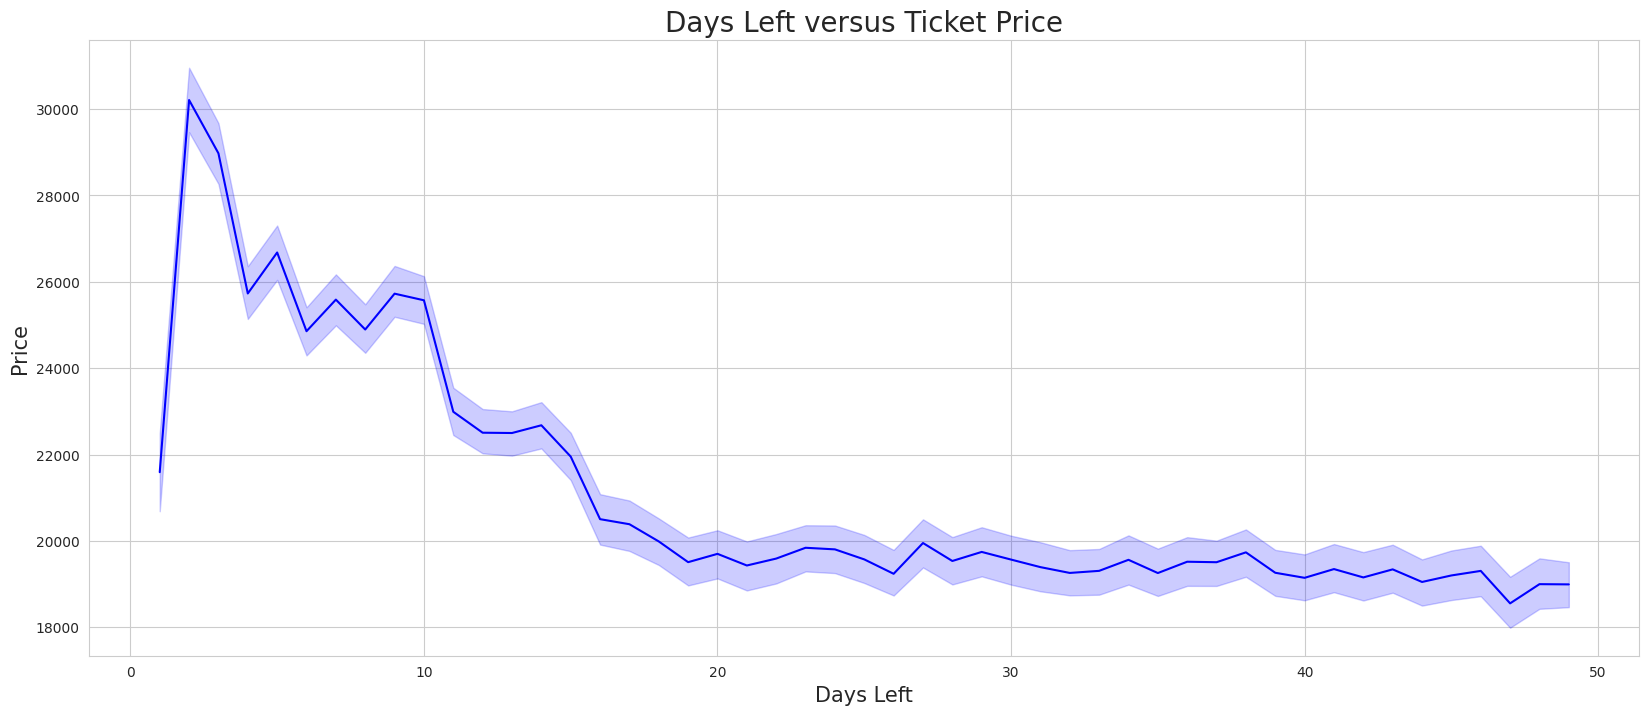

In [99]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left versus Ticket Price',fontsize=20)
plt.xlabel('Days Left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

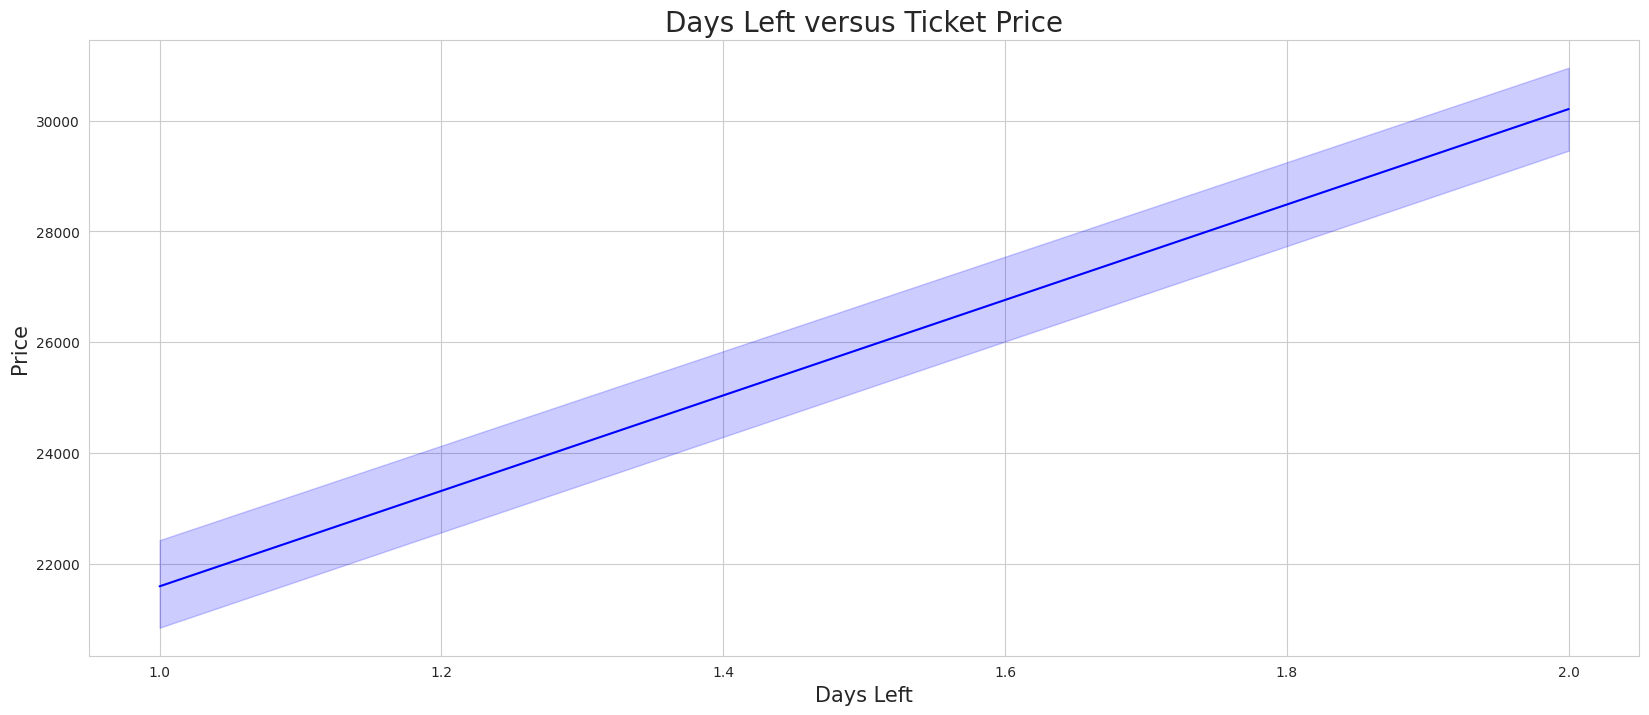

In [100]:
plt.figure(figsize=(20,8))
sns.lineplot(data=prices12days,x='days_left',y='price',color='blue')
plt.title('Days Left versus Ticket Price',fontsize=20)
plt.xlabel('Days Left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [101]:
pivot = pd.pivot_table(prices12days,
                       values='price',
                       index='airline',
                       columns='days_left',
                       aggfunc='median')
pivot['diffprice'] = pivot[1] - pivot[2]
pivot.sort_values(by='diffprice', ascending=False)

days_left,1,2,diffprice
airline,,,
SpiceJet,12217.0,9026.0,3191.0
GO_FIRST,11812.0,9840.0,1972.0
Indigo,13279.0,11867.0,1412.0
AirAsia,8954.0,7995.0,959.0
Vistara,17499.0,23228.0,-5729.0
Air_India,15378.5,24657.0,-9278.5


The graph shows that the longer the distance between the day of booking and the flight schedule, the lower the price given, especially between 10 and 20 days before the scheduled flight.  For more than 20 days, the price tends to be constant.

When comparing one and two days before the flight, the price offered based on the median price one day before the travel is around 26% lower than two days before the flight.

Further analysis of each airline reveals that two out of six airlines (Vistara and Air_India) offer higher prices two days than a day before the flight schedule. Meanwhile, other airlines, such as SpiceJet, GO_FIRST, Indigo, and AirAsia, provide lower prices two days before the flight schedule. Air_India Airlines has the largest median price variation between two days before travel, at 9278.5, while AirAsia Airlines has the least difference.

# Does ticket price change based on the departure time and arrival time?

In [102]:
data['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [103]:
data['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [104]:
encoder = LabelEncoder()

data['departure_encoded'] = encoder.fit_transform(data['departure_time'])
data['arrival_encoded'] = encoder.fit_transform(data['arrival_time'])

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,5
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,4,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,4,4


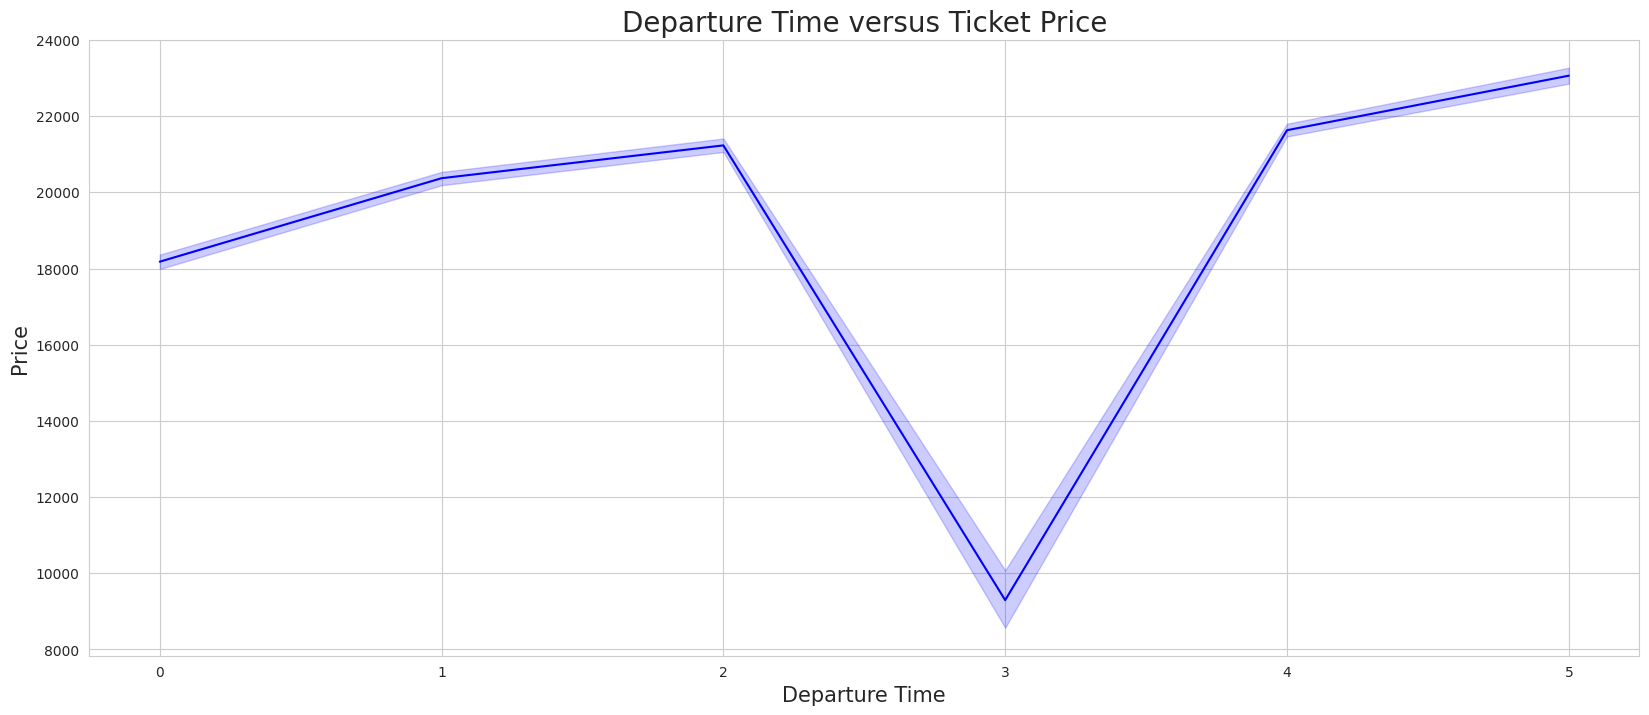

In [105]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='departure_encoded',y='price',color='blue')
plt.title('Departure Time versus Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

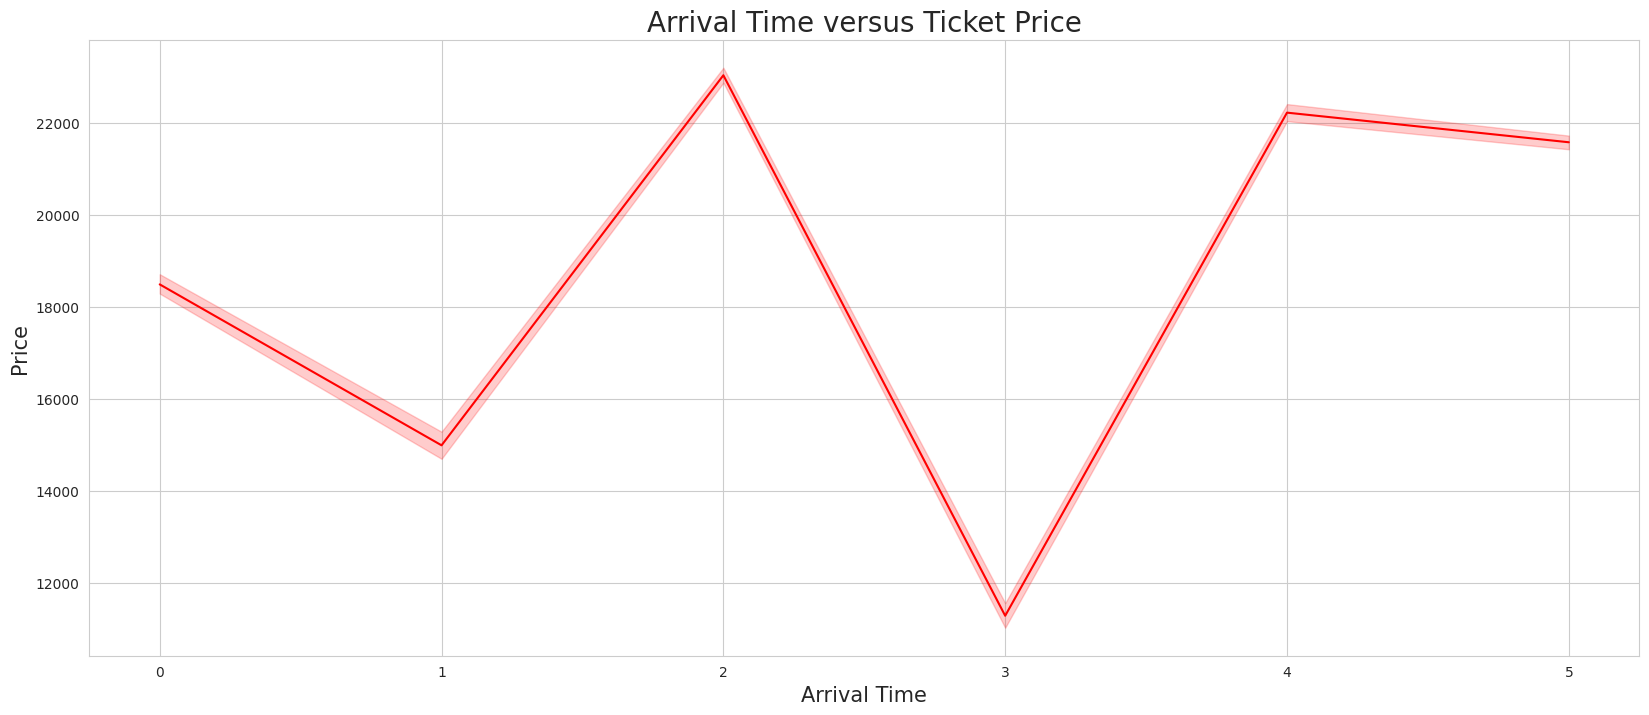

In [106]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='arrival_encoded',y='price',color='red')
plt.title('Arrival Time versus Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

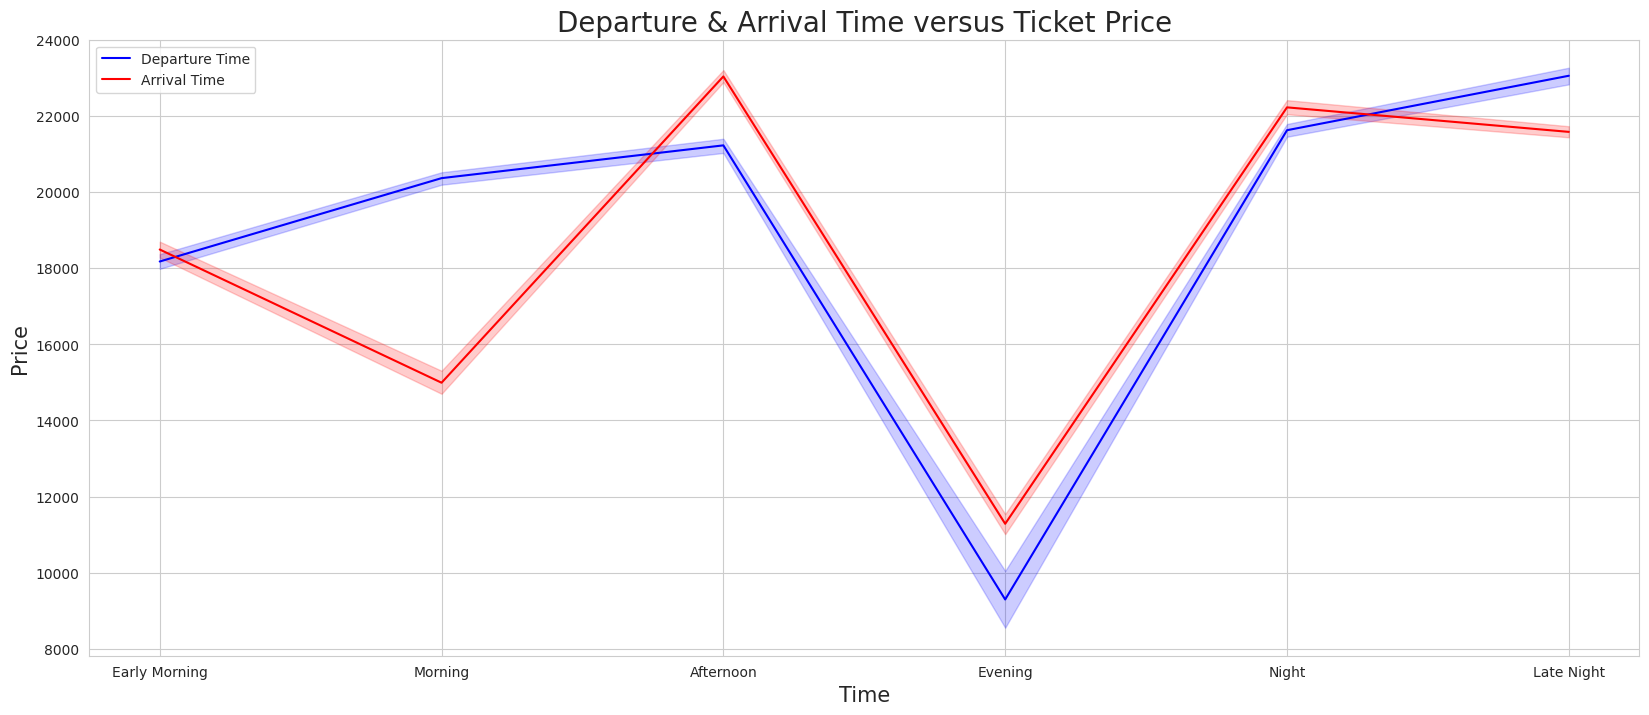

In [107]:
time_labels = {0: "Early Morning", 1: "Morning", 2: "Afternoon", 3: "Evening", 4: "Night", 5: "Late Night"}

plt.figure(figsize=(20,8))
sns.lineplot(data=data, x='departure_encoded', y='price', color='blue', label='Departure Time')
sns.lineplot(data=data, x='arrival_encoded', y='price', color='red', label='Arrival Time')
plt.title('Departure & Arrival Time versus Ticket Price', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(ticks=list(time_labels.keys()), labels=list(time_labels.values()))
plt.legend()
plt.show()

The price comparison chart for each departure and arrival time shows significant price differences for morning flights, reaching 5000. In the afternoon and evening, the departure price is approximately 2000-3000 lower than the arrival price. For late-night flights, the departure price is approximately 2000 greater than the arrival price. The remaining time, especially early morning and night, displays that the prices given for departure and arrival are generally the same. This implies that prices vary depending on arrival and departure time, especially during the morning, afternoon, evening, and late night.

# How the price changes with change in Source and Destination?

In [108]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,5
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,4,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,4,4


In [109]:
data['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [110]:
data['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [111]:
encoder = LabelEncoder()

data['source_encoded'] = encoder.fit_transform(data['source_city'])
data['destination_encoded'] = encoder.fit_transform(data['destination_city'])

data.sample()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded,source_encoded,destination_encoded
205641,Indigo,6E-495,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.17,38,1105,1,1,1,3


<ipython-input-112-243fea573a6e>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


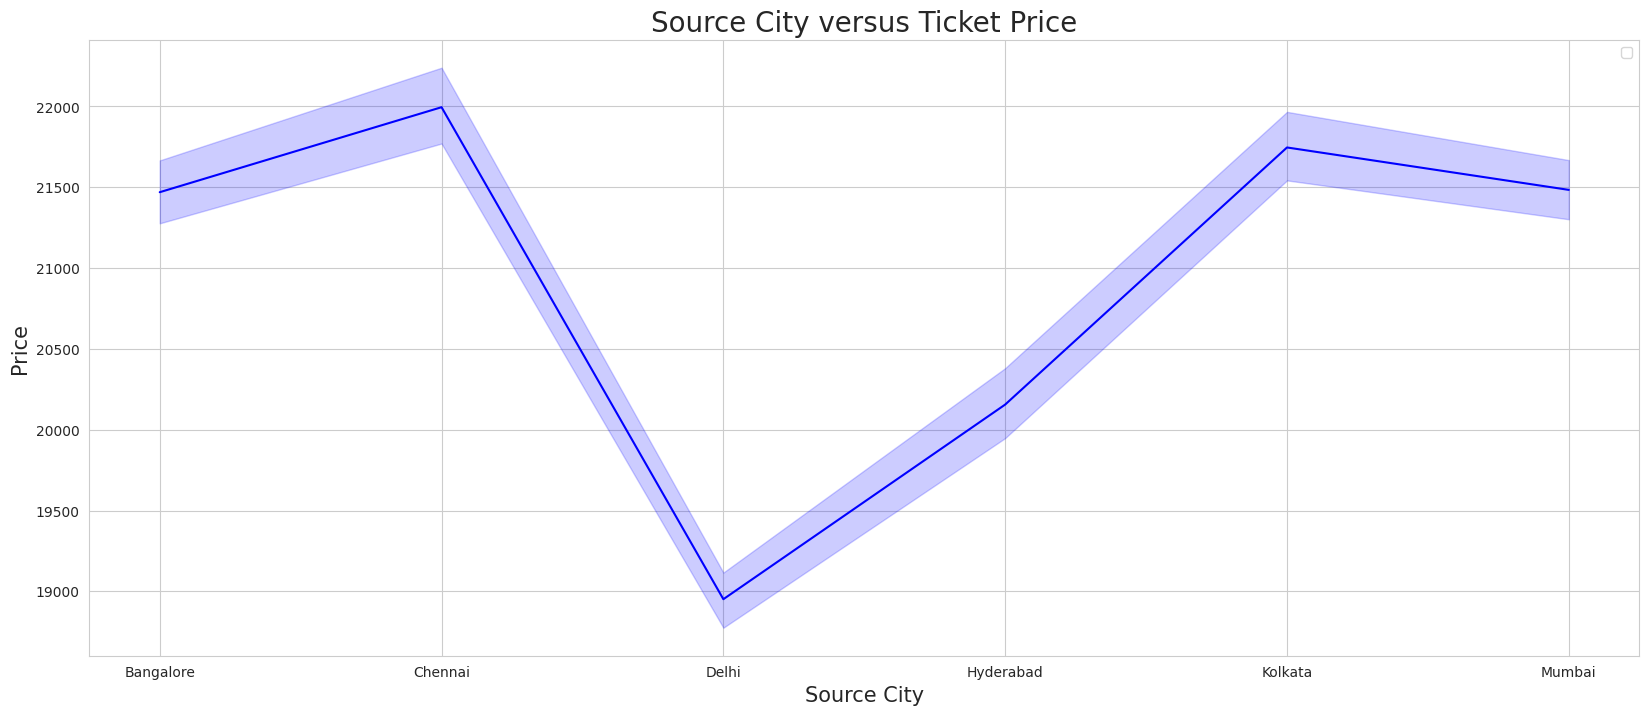

In [112]:
source_city = {0: "Bangalore", 1: "Chennai", 2: "Delhi", 3: "Hyderabad", 4: "Kolkata", 5: "Mumbai"}

plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='source_encoded',y='price',color='blue')
plt.title('Source City versus Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(ticks=list(source_city.keys()), labels=list(source_city.values()))
plt.legend()
plt.show()

<ipython-input-113-41ed57f14dd0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


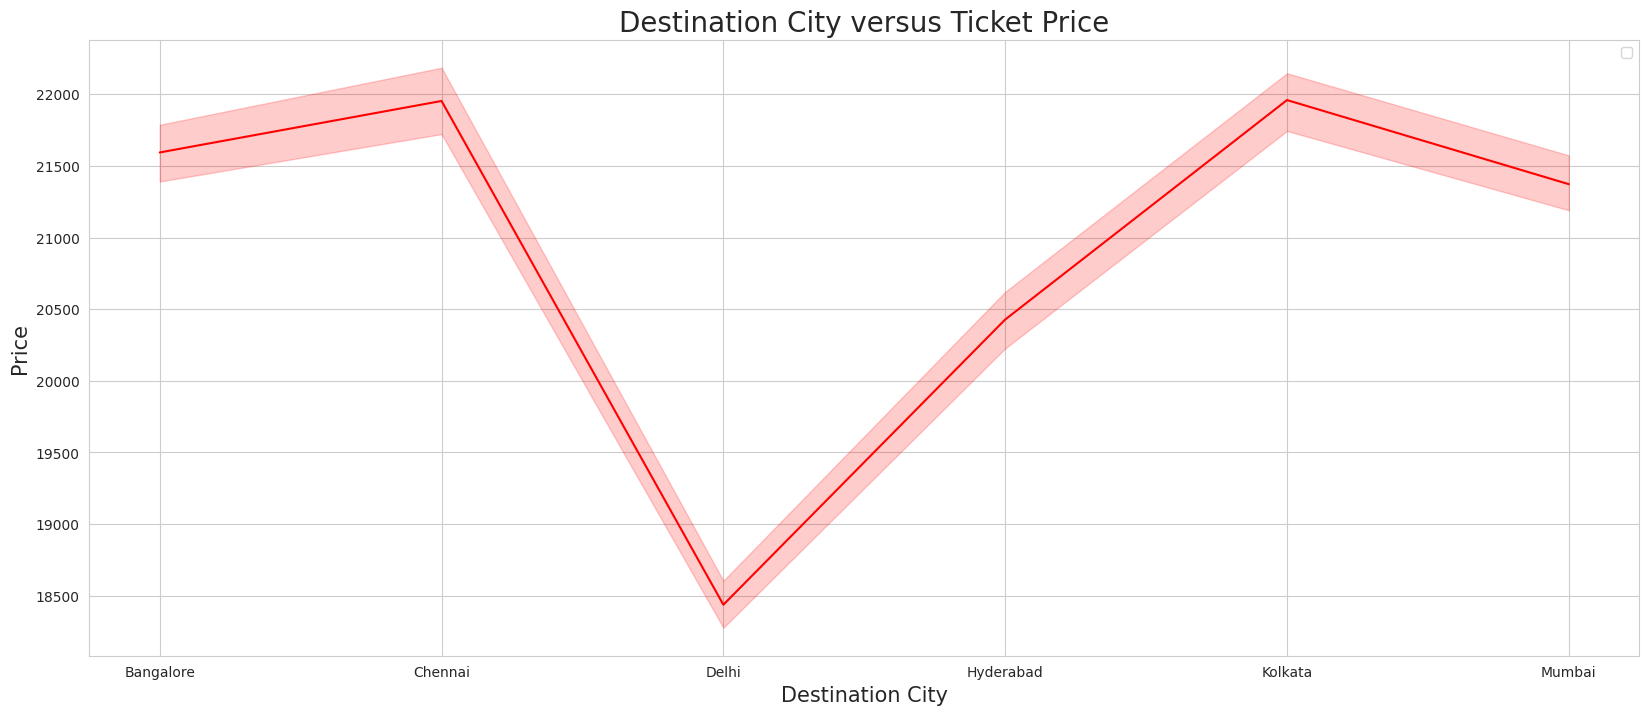

In [113]:
source_city = {0: "Bangalore", 1: "Chennai", 2: "Delhi", 3: "Hyderabad", 4: "Kolkata", 5: "Mumbai"}

plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='destination_encoded',y='price',color='red')
plt.title('Destination City versus Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(ticks=list(source_city.keys()), labels=list(source_city.values()))
plt.legend()
plt.show()

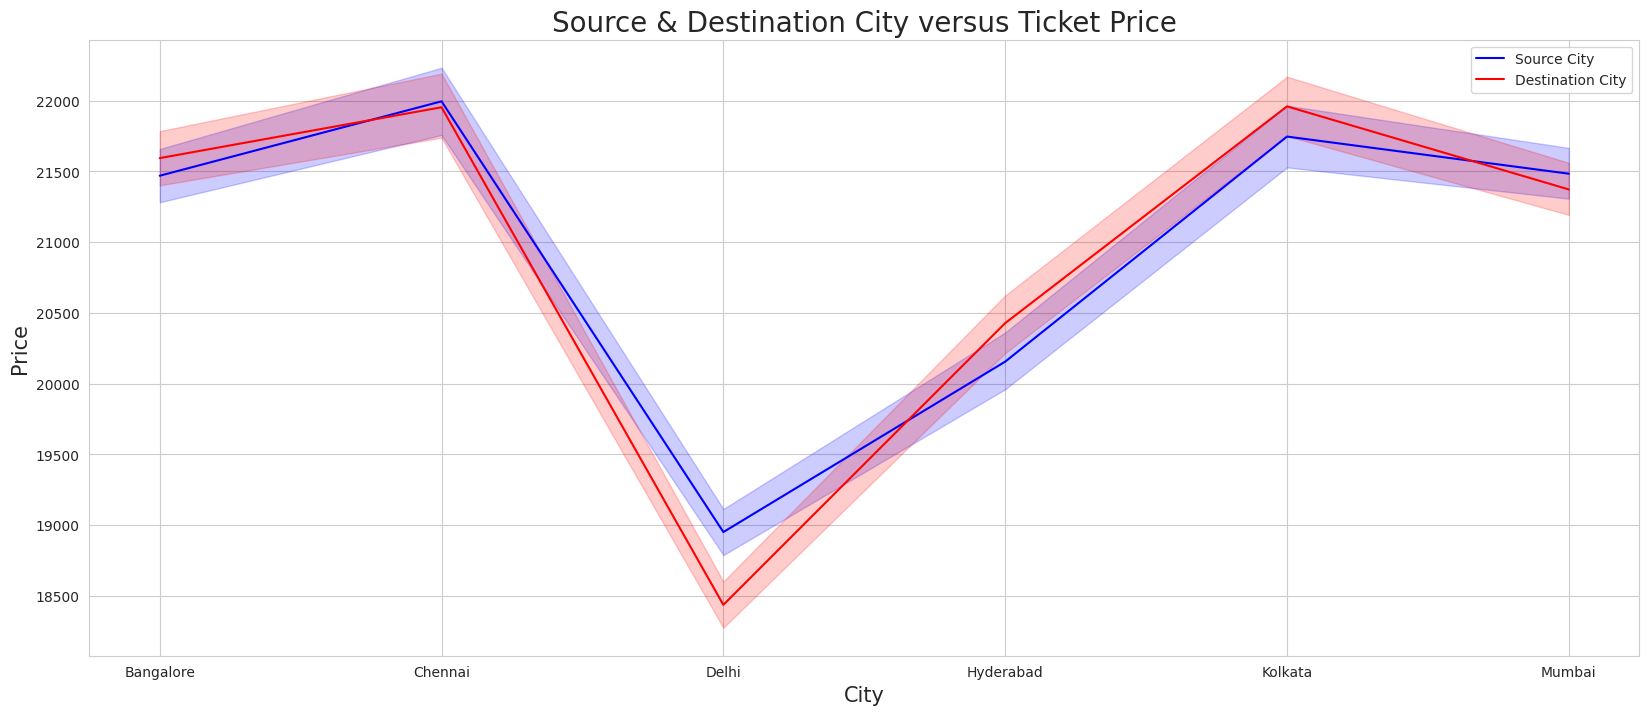

In [114]:
source_city = {0: "Bangalore", 1: "Chennai", 2: "Delhi", 3: "Hyderabad", 4: "Kolkata", 5: "Mumbai"}

plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='source_encoded',y='price',color='blue', label='Source City')
sns.lineplot(data=data,x='destination_encoded',y='price',color='red', label='Destination City')
plt.title('Source & Destination City versus Ticket Price',fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(ticks=list(source_city.keys()), labels=list(source_city.values()))
plt.legend()
plt.show()

The graph above indicates that the prices for every city used as a source and destination tend to be the same. There is a price difference between Delhi as the destination and the source city. When the destination is Delhi, the price is about 500 cheaper than the flight price. When comparing the prices of each region, the destination and source prices of Chennai are the most expensive compared to other cities, followed by Kolkata, Bangalore, and Mumbai. Meanwhile, Delhi has the lowest price, and Hyderabad is in the second lowest price category, around 20000-20500.

# How does the ticket price vary between Economy and Business class?

In [115]:
encoder = LabelEncoder()

data['class_encoded'] = encoder.fit_transform(data['class'])

data.sample()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded,source_encoded,destination_encoded,class_encoded
121670,Vistara,UK-774,Kolkata,Night,one,Evening,Delhi,Economy,23.17,15,10605,5,2,4,2,1


<ipython-input-116-3a42260b0f95>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


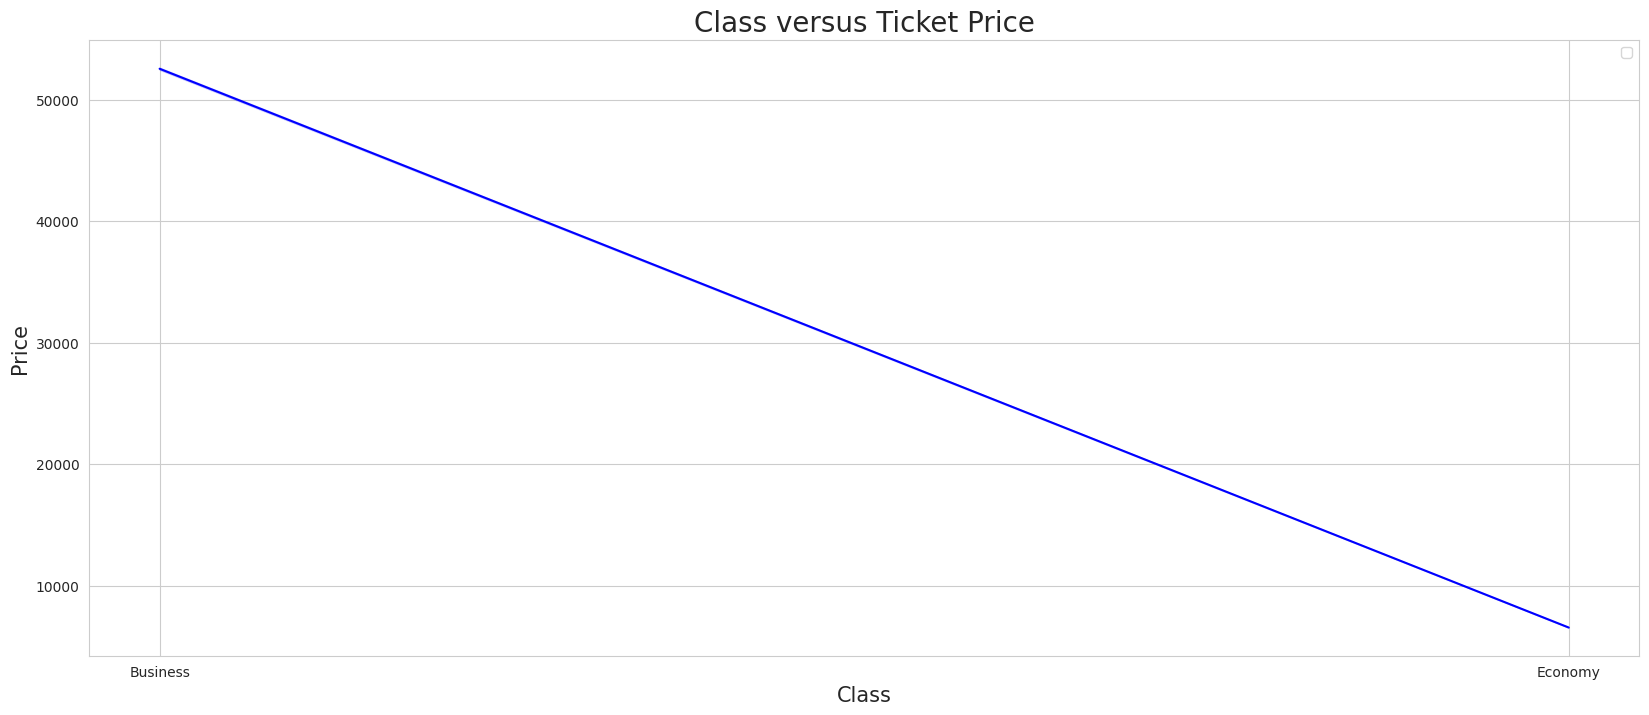

In [116]:
class_cat = {0: "Business", 1: "Economy"}

plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='class_encoded',y='price',color='blue')
plt.title('Class versus Ticket Price',fontsize=20)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(ticks=list(class_cat.keys()), labels=list(class_cat.values()))
plt.legend()
plt.show()

Economy class flights will always be significantly cheaper than business class. It is also shown that the difference can be more than 4000.

# Regression Analysis

## Data Preparation

In [117]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded,source_encoded,destination_encoded,class_encoded
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,5,2,5,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1,4,2,5,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,1,2,5,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,4,0,2,5,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,4,4,2,5,1


In [118]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [119]:
encoder = LabelEncoder()

data['airline_encoded'] = encoder.fit_transform(data['airline'])
data['stops_encoded'] = encoder.fit_transform(data['stops'])

data.sample()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_encoded,arrival_encoded,source_encoded,destination_encoded,class_encoded,airline_encoded,stops_encoded
27609,Indigo,6E-6278,Delhi,Morning,one,Afternoon,Kolkata,Economy,6.83,43,4710,4,0,2,4,1,3,0


In [120]:
df = data.drop(['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'], axis=1)

df.sample()

,duration,days_left,price,departure_encoded,arrival_encoded,source_encoded,destination_encoded,class_encoded,airline_encoded,stops_encoded
32383,14.83,29,5232,1,5,2,3,1,1,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   duration             300153 non-null  float64
 1   days_left            300153 non-null  int64  
 2   price                300153 non-null  int64  
 3   departure_encoded    300153 non-null  int64  
 4   arrival_encoded      300153 non-null  int64  
 5   source_encoded       300153 non-null  int64  
 6   destination_encoded  300153 non-null  int64  
 7   class_encoded        300153 non-null  int64  
 8   airline_encoded      300153 non-null  int64  
 9   stops_encoded        300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


<ipython-input-122-8fbee54b1458>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'][~df['price'].isnull()], axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})


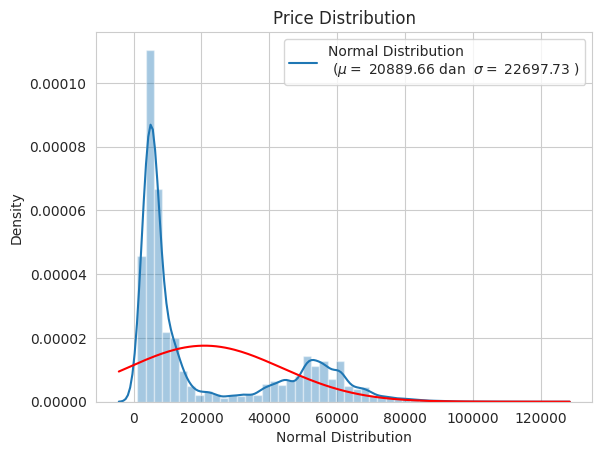

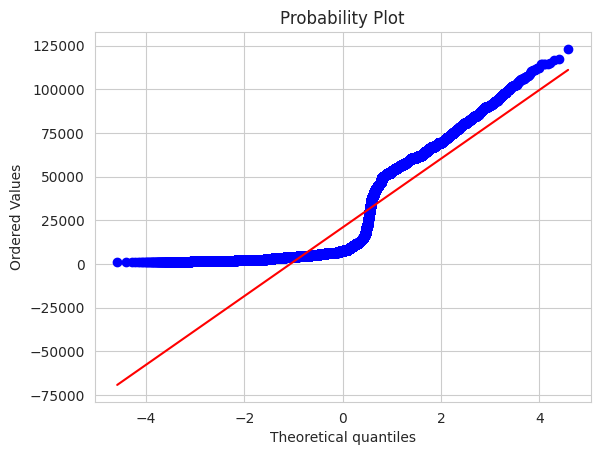

Shapiro-Wilk test:
Test Statistic: 0.7520, p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)


In [122]:
# Normality check
sns.set_style('whitegrid')

sns.distplot(df['price'][~df['price'].isnull()], axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})
plt.title('Price Distribution')
(mu, sigma) = st.norm.fit(df['price'])
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} dan  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()
st.probplot(df['price'][~df['price'].isnull()], plot=plt)
plt.show()

# Tes Shapiro-Wilk
shapiro_test = st.shapiro(df['price'][~df['price'].isnull()])
print("Shapiro-Wilk test:\nTest Statistic: {:.4f}, p-value: {:.4f}".format(shapiro_test[0], shapiro_test[1]))

p-value < 0.05 shows that `price` is not normally distributed. A quantile transformation will be performed for the `price` variable.

<ipython-input-123-acc9e2c4e322>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_quantile'][~df['price_quantile'].isnull()], axlabel="Distribusi Quantile", fit=stats.norm, fit_kws={"color":"red"})


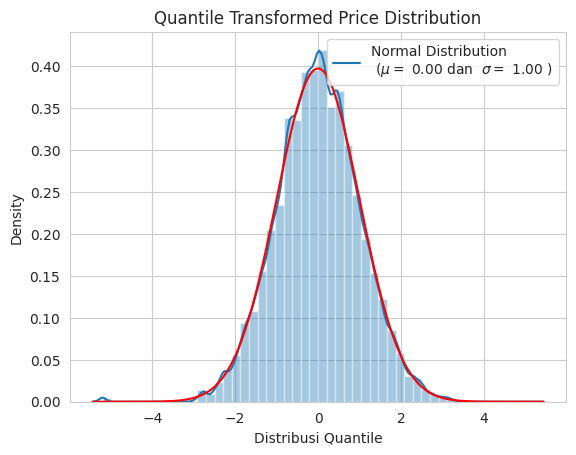

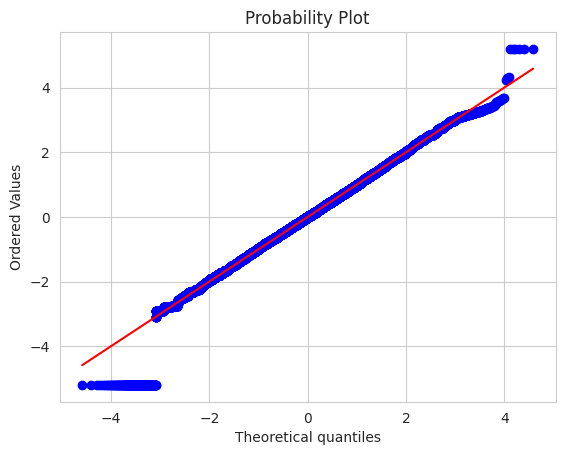

Shapiro-Wilk (Quantile):
 Test Statistic: 0.9964, P-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)


In [123]:
from sklearn.preprocessing import QuantileTransformer
from scipy import stats

# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')
df['price_quantile'] = quantile_transformer.fit_transform(df[['price']])

# Plot the transformed data
sns.set_style('whitegrid')
sns.distplot(df['price_quantile'][~df['price_quantile'].isnull()], axlabel="Distribusi Quantile", fit=stats.norm, fit_kws={"color":"red"})
plt.title('Quantile Transformed Price Distribution')
(mu, sigma) = stats.norm.fit(df['price_quantile'])
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} dan  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()

# Q-Q plot
stats.probplot(df['price_quantile'][~df['price_quantile'].isnull()], plot=plt)
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['price_quantile'][~df['price_quantile'].isnull()])
print("Shapiro-Wilk (Quantile):\n Test Statistic: {:.4f}, P-value: {:.4f}".format(shapiro_test[0], shapiro_test[1]))

Although quantile transformation was performed, the data was still not normally distributed according to the Shapiro-Wilk test, but the histogram and Q-Q plot showed that the data distribution had improved.

In [124]:
df = df.drop(['price'], axis=1)

df.sample()

,duration,days_left,departure_encoded,arrival_encoded,source_encoded,destination_encoded,class_encoded,airline_encoded,stops_encoded,price_quantile
117600,12.75,26,5,4,0,1,1,5,0,-0.240856


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   duration             300153 non-null  float64
 1   days_left            300153 non-null  int64  
 2   departure_encoded    300153 non-null  int64  
 3   arrival_encoded      300153 non-null  int64  
 4   source_encoded       300153 non-null  int64  
 5   destination_encoded  300153 non-null  int64  
 6   class_encoded        300153 non-null  int64  
 7   airline_encoded      300153 non-null  int64  
 8   stops_encoded        300153 non-null  int64  
 9   price_quantile       300153 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 22.9 MB


There are no missing values.

## Data Exploration

## Distribution of Numerical Data

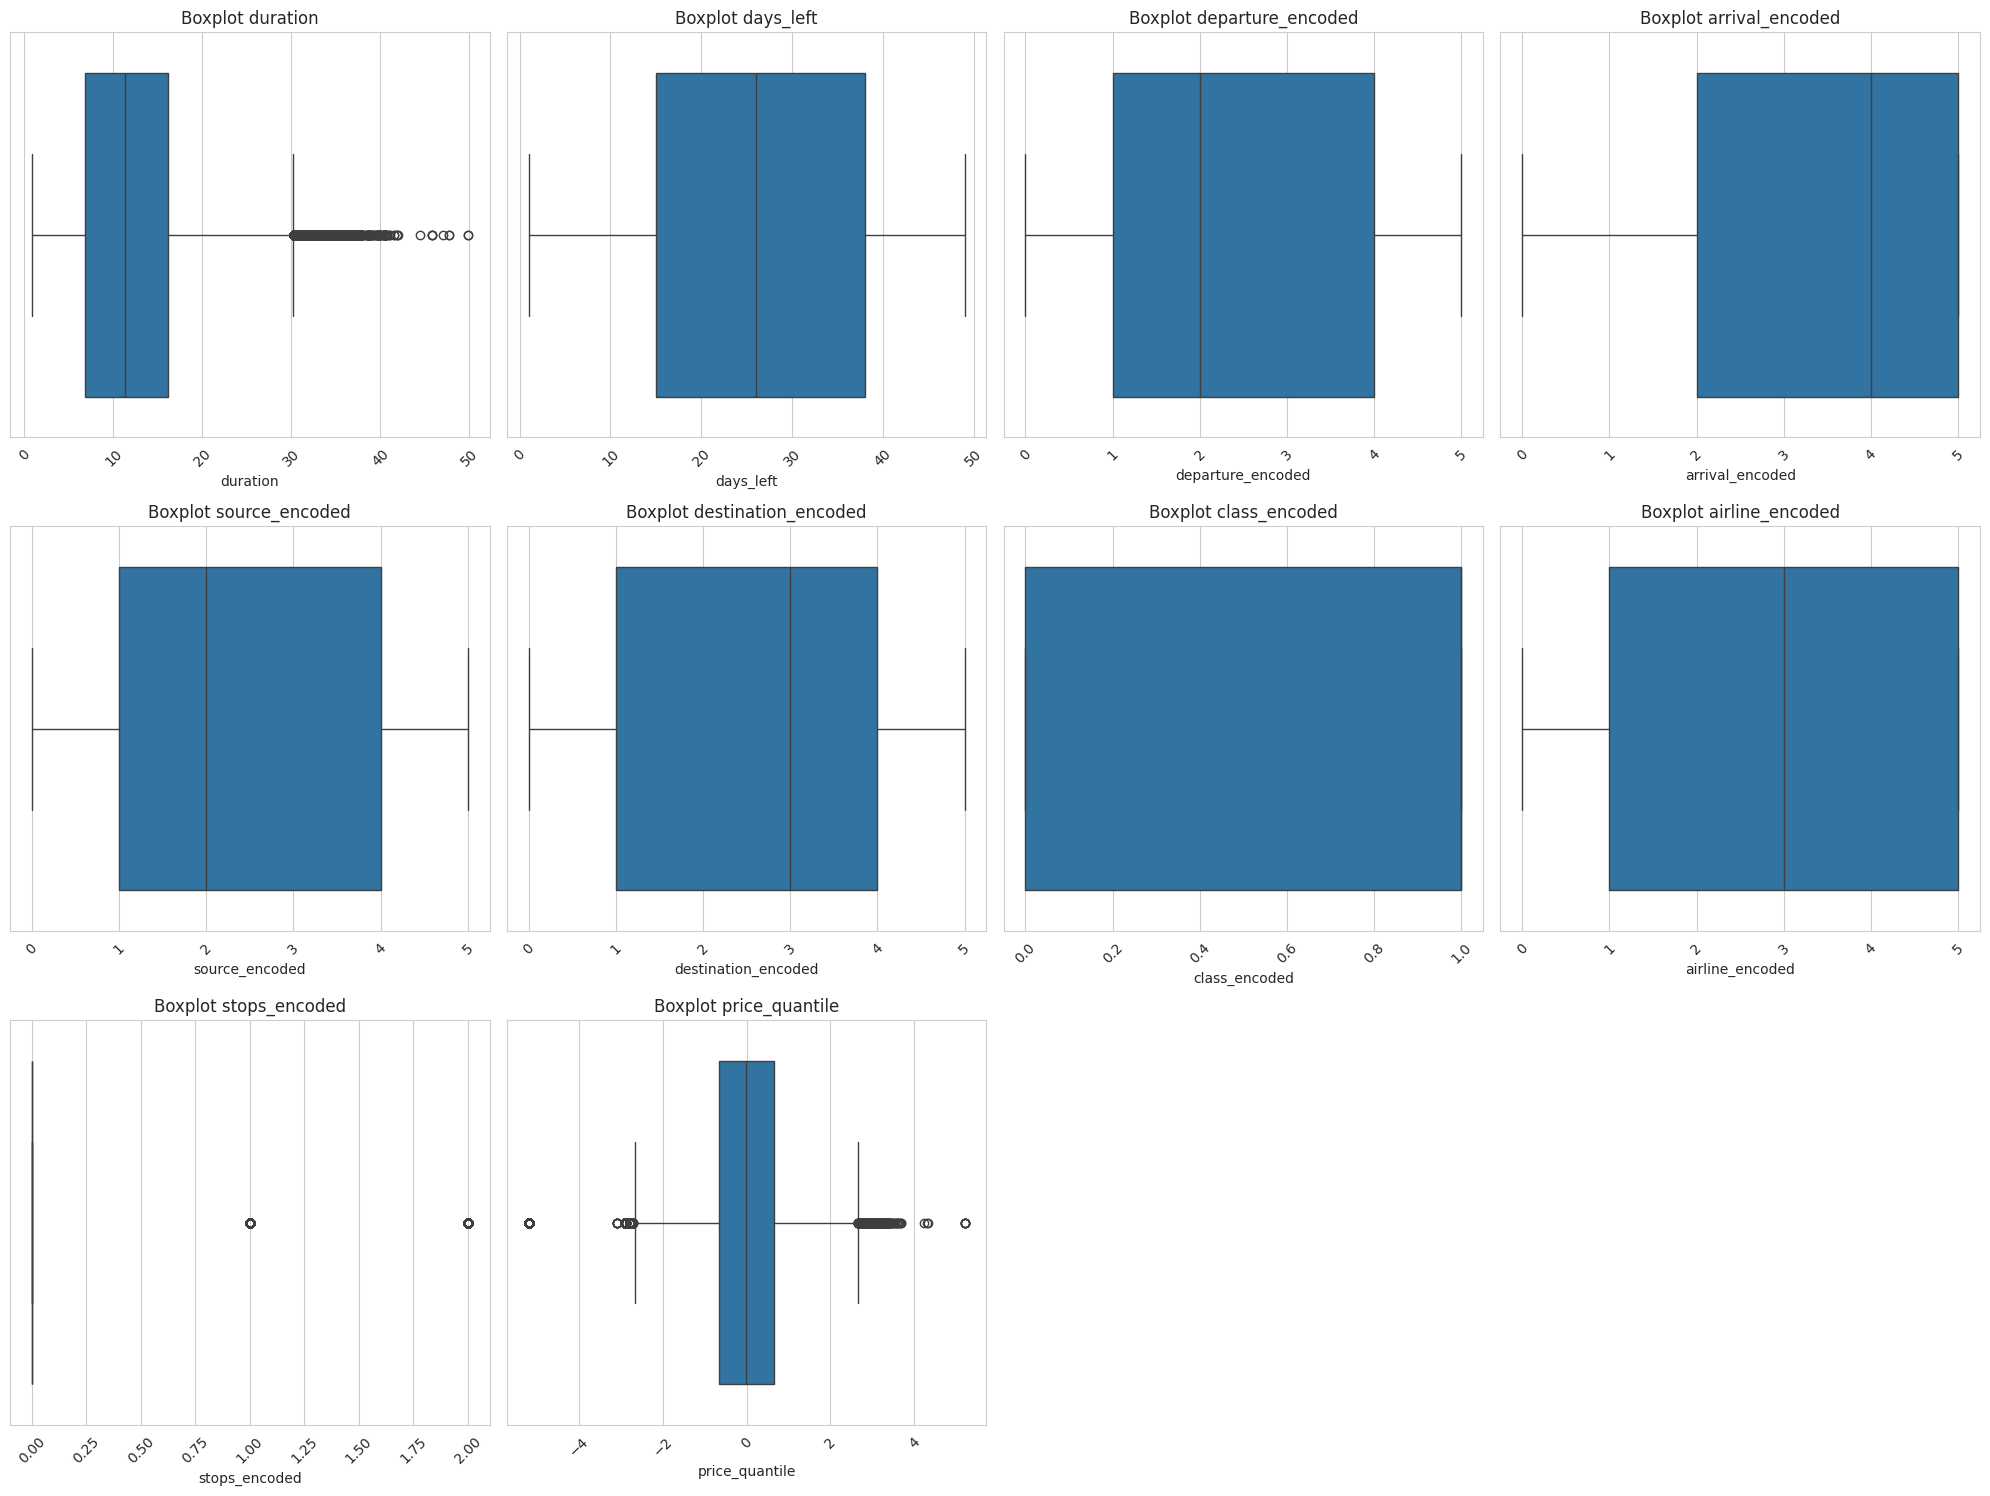

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numeric_cols)
ncols = 4
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 5, nrows * 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

There are several variables that have outliers.

## Linear Correlation of Predictors and Response

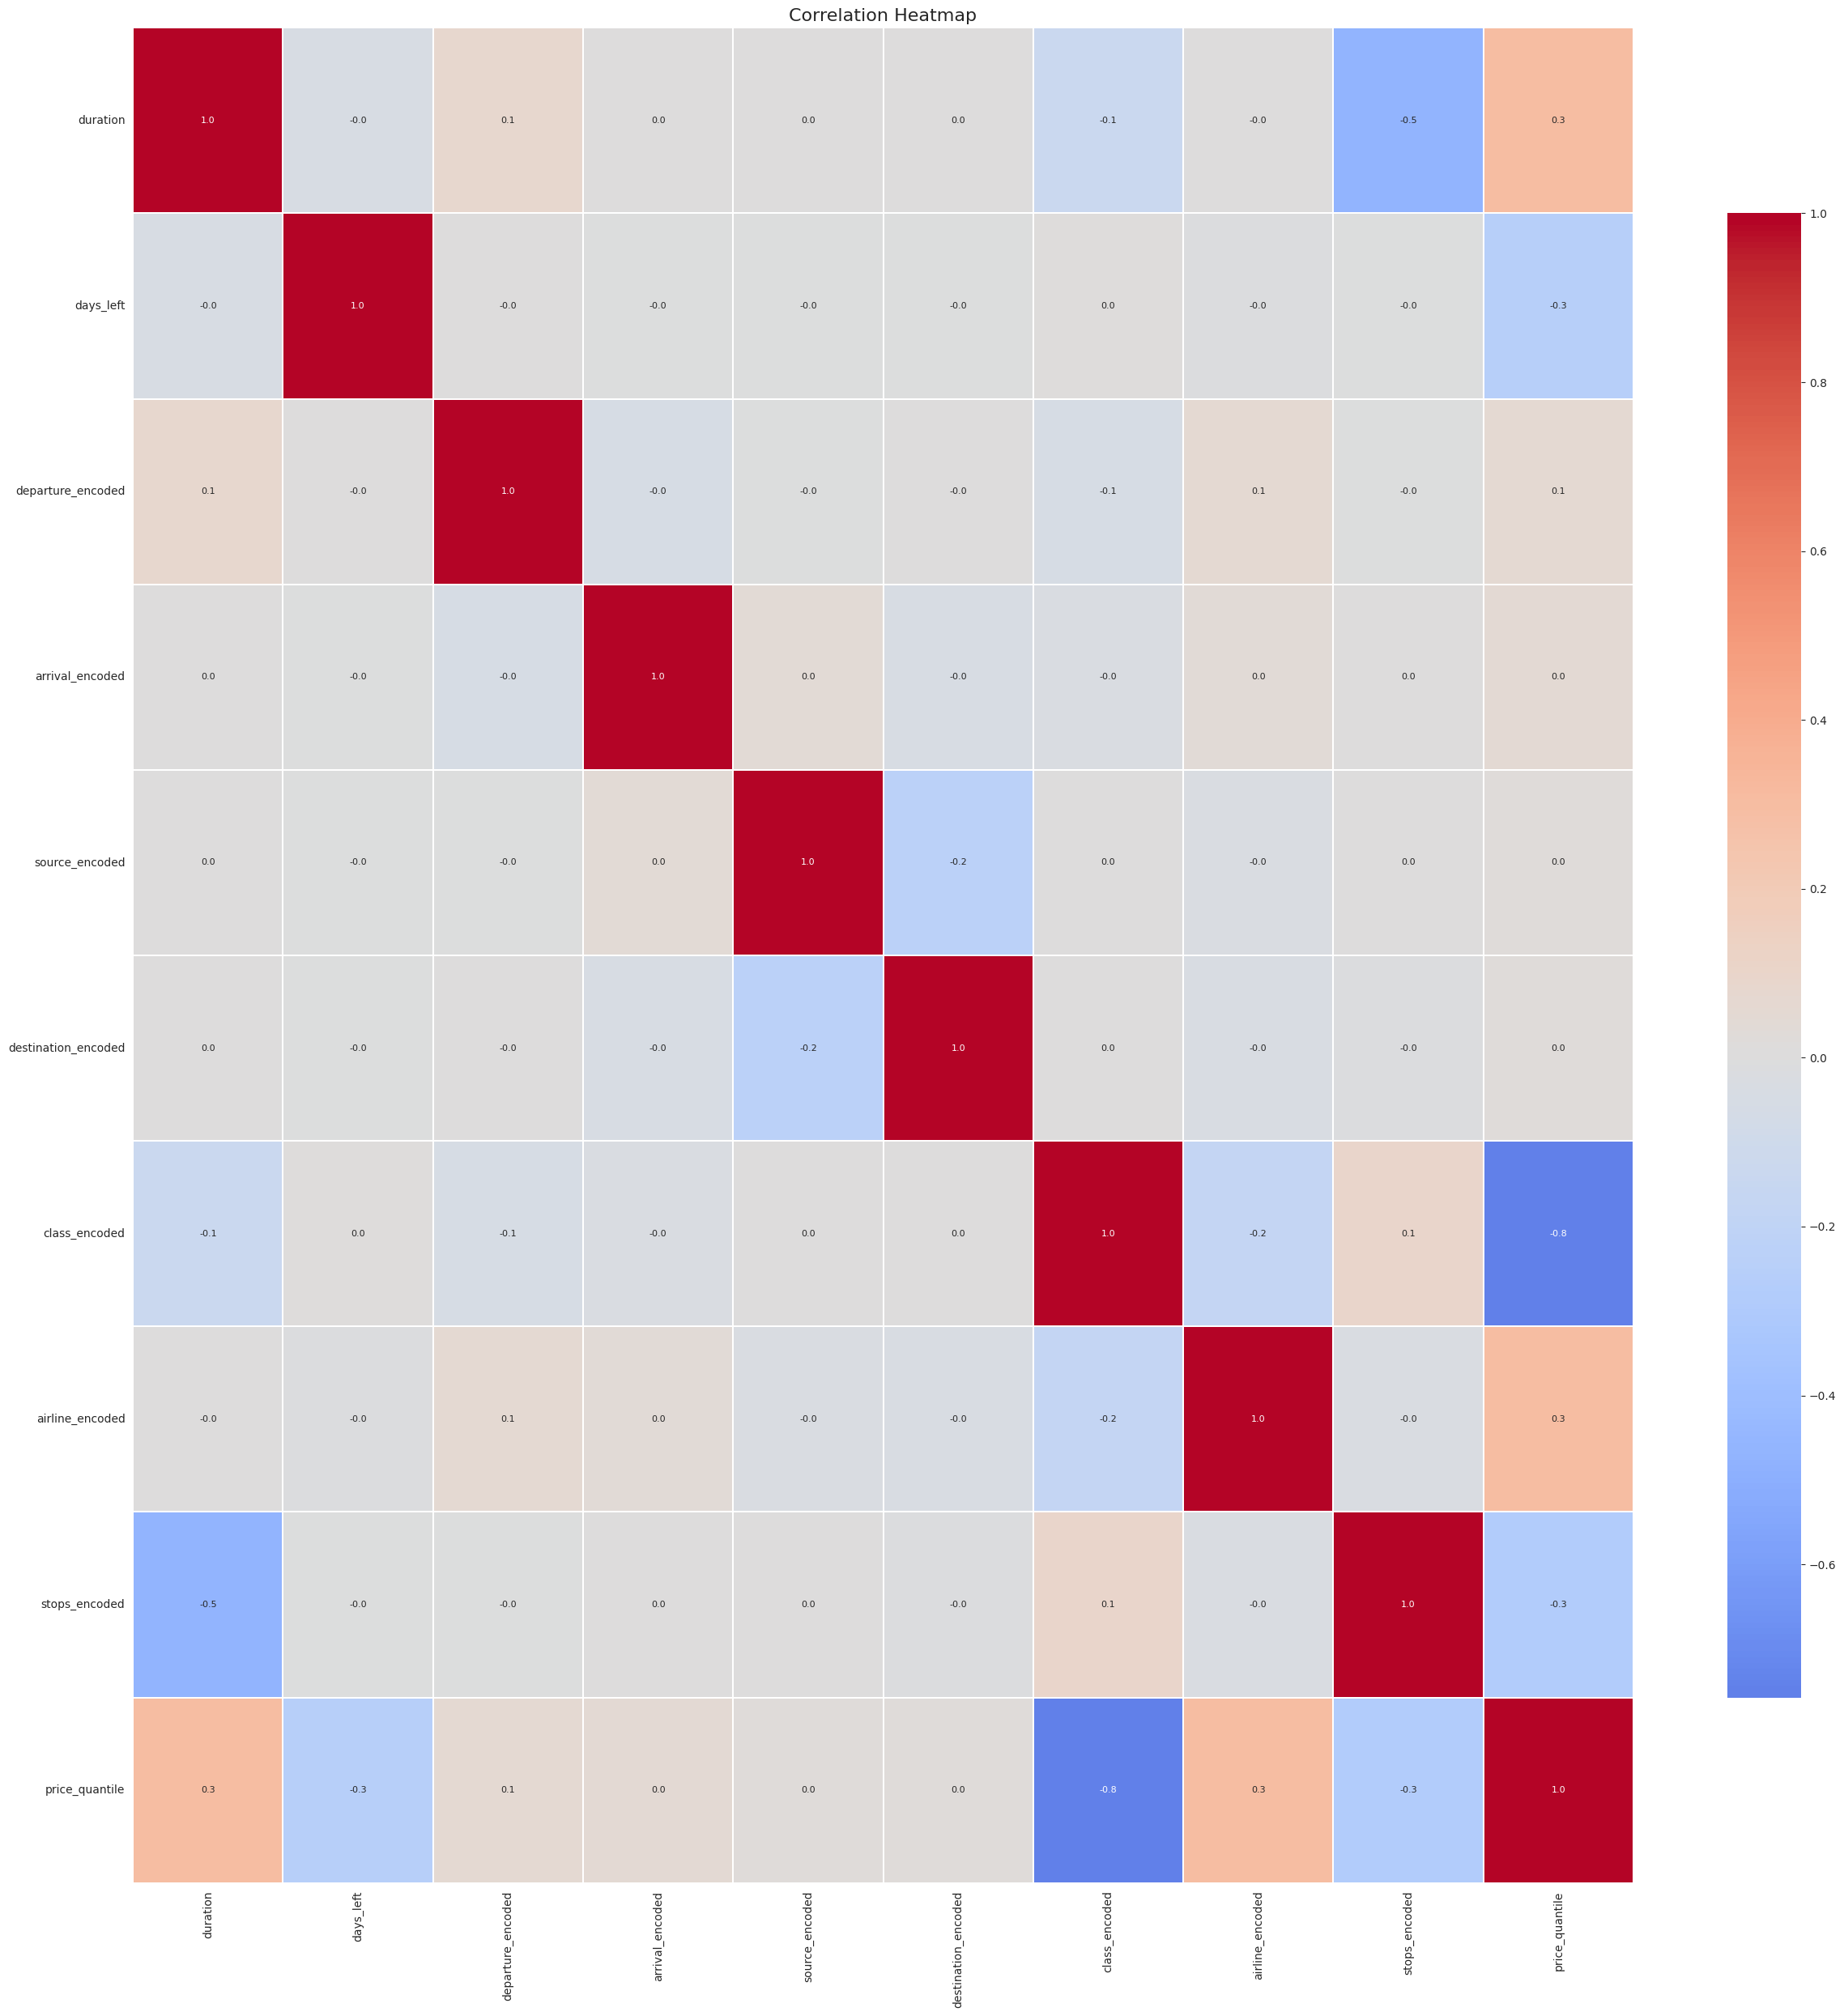

In [127]:
fig, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm',
            linewidths=.2, ax=ax, center=0,
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})

plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Correlation Heatmap', fontsize=16)

plt.tight_layout()
plt.show()

## Multicollinearity

In [128]:
df_copy = df.copy()

X = df_copy.drop(columns=['price_quantile'])
y = df_copy['price_quantile']

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

pd.set_option('display.max_rows', 83)
vif_data

,Feature,VIF
0,const,27.728628
1,duration,1.319280
2,days_left,1.002650
3,departure_encoded,1.015740
4,arrival_encoded,1.007628
5,source_encoded,1.055332
6,destination_encoded,1.054824
7,class_encoded,1.057130
8,airline_encoded,1.041244
9,stops_encoded,1.296544


There are no multicollinearity.

## Split Data

In [130]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=['price_quantile'])
y = df_copy['price_quantile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data training size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Data testing size: X_test: {X_test.shape}, y_test: {y_test.shape}")

Data training size: X_train: (240122, 9), y_train: (240122,)
Data testing size: X_test: (60031, 9), y_test: (60031,)


## Modelling

## Model Evaluation

In [131]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Validation RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "Train R2": r2_score(y_train, y_train_pred),
        "Validation R2": r2_score(y_val, y_val_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Validation MAE": mean_absolute_error(y_val, y_val_pred),
    }
    return metrics

# Linear Regression
lr_model = LinearRegression()
lr_metrics = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print("Linear Regression Results:", lr_metrics)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_metrics = evaluate_model(ridge_model, X_train, y_train, X_test, y_test)
print("Ridge Regression Results:", ridge_metrics)

# LASSO Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_metrics = evaluate_model(lasso_model, X_train, y_train, X_test, y_test)
print("LASSO Regression Results:", lasso_metrics)

# Stochastic Gradient Descent
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_metrics = evaluate_model(sgd_model, X_train, y_train, X_test, y_test)
print("Stochastic Gradient Descent Results:", sgd_metrics)

# Polynomial Regression
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)  # Adjust degree as needed
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)
poly_model = LinearRegression()
poly_metrics = evaluate_model(poly_model, X_train_poly, y_train, X_test_poly, y_test)
print("Polynomial Regression Results:", poly_metrics)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_metrics = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print("Random Forest Regression Results:", rf_metrics)

models_metrics = {
    "Linear Regression": lr_metrics,
    "Ridge Regression": ridge_metrics,
    "LASSO Regression": lasso_metrics,
    "Stochastic Gradient Descent": sgd_metrics,
    "Polynomial Regression": poly_metrics,
    "Random Forest": rf_metrics
}

for model_name, metrics in models_metrics.items():
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Linear Regression Results: {'Train RMSE': 0.5341751943669986, 'Validation RMSE': 0.5355665316049809, 'Train R2': 0.7165567143854038, 'Validation R2': 0.7148369064047642, 'Train MAE': 0.414673954675773, 'Validation MAE': 0.4147352201717687}
Ridge Regression Results: {'Train RMSE': 0.534175194547186, 'Validation RMSE': 0.5355664441256243, 'Train R2': 0.7165567141941822, 'Validation R2': 0.7148369995617501, 'Train MAE': 0.41467282321821314, 'Validation MAE': 0.41473396567394666}
LASSO Regression Results: {'Train RMSE': 0.5933381346066262, 'Validation RMSE': 0.5929863170872767, 'Train R2': 0.6502938548093383, 'Validation R2': 0.6504125741848261, 'Train MAE': 0.4465886214511536, 'Validation MAE': 0.44426473374778414}
Stochastic Gradient Descent Results: {'Train RMSE': 0.5386670561495758, 'Validation RMSE': 0.5402107169964164, 'Train R2': 0.711769741219663, 'Validation R2': 0.7098698583476177, 'Train MAE': 0.4177156942290872, 'Validation MAE': 0.4179196746086058}
Polynomial Regression Result

In [132]:
df_test = X_test.copy()
df_test['price_quantile'] = y_test

def select_best_model(models_metrics):
    best_model = None
    best_rmse = float('inf')
    best_r2 = -float('inf')

    for model_name, metrics in models_metrics.items():
        if metrics['Validation RMSE'] < best_rmse and metrics['Validation R2'] > best_r2:
            best_model = model_name
            best_rmse = metrics['Validation RMSE']
            best_r2 = metrics['Validation R2']

    return best_model, best_rmse, best_r2

def make_predictions(best_model, df_test):
    ids_test = df_test.index
    X_test_features = df_test.drop(columns=['price_quantile'], errors='ignore')
    y_test_pred = best_model.predict(X_test_features)

    df_test_result = pd.DataFrame({
        'Id': ids_test,
        'price_quantile': y_test_pred
    })
    return df_test_result

best_model_name, best_model_rmse, best_model_r2 = select_best_model(models_metrics)
print(f"Model terbaik: {best_model_name} dengan RMSE: {best_model_rmse} dan R²: {best_model_r2}")

best_model = None
if best_model_name == "Linear Regression":
    best_model = LinearRegression()
elif best_model_name == "Ridge Regression":
    best_model = Ridge(alpha=1.0)
elif best_model_name == "LASSO Regression":
    best_model = Lasso(alpha=0.1)
elif best_model_name == "Stochastic Gradient Descent":
    best_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
elif best_model_name == "Polynomial Regression":
    poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_val_poly = poly_transformer.transform(X_test)
    best_model = LinearRegression()
elif best_model_name == "Random Forest":
    best_model = RandomForestRegressor(n_estimators=100, random_state=42)

best_model.fit(X_train, y_train)

df_test_result = make_predictions(best_model, df_test)
df_test_result

Model terbaik: Random Forest dengan RMSE: 0.20983849496186782 dan R²: 0.9562239286070991


,Id,price_quantile
0,27131,-0.176445
1,266857,2.082443
2,141228,-0.230353
3,288329,1.397732
4,97334,-0.165503
...,...,...
60026,5234,-0.581460
60027,5591,-1.433297
60028,168314,-0.175223
60029,175191,-1.095315


## Importance Features

In [133]:
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
class_encoded,0.574797
days_left,0.129698
duration,0.126637
airline_encoded,0.066901
source_encoded,0.038078
destination_encoded,0.034379
arrival_encoded,0.011328
departure_encoded,0.011188
stops_encoded,0.006995


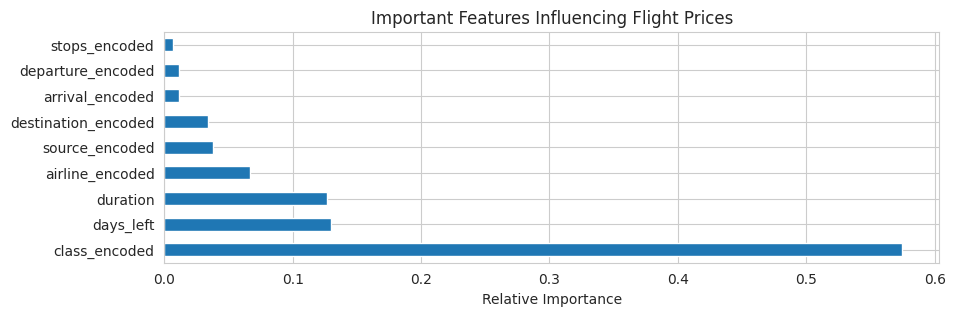

In [134]:
plt.figure(figsize=(10, 3))
feature_scores.nlargest(9).plot(kind='barh')
plt.title('Important Features Influencing Flight Prices')
plt.xlabel('Relative Importance')
plt.show()

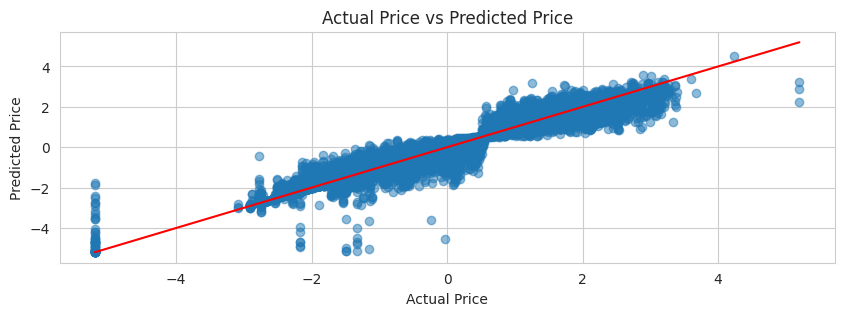

In [135]:
# Scatter Plot between predicted and Actual Prices
y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()